# Задание

Набор данных ex2data1.txt представляет собой текстовый файл, содержащий информацию об оценке студента по первому экзамену (первое число в строке), оценке по второму экзамену (второе число в строке) и поступлении в университет (0 - не поступил, 1 - поступил).

Набор данных ex2data2.txt представляет собой текстовый файл, содержащий информацию о результате первого теста (первое число в строке) и результате второго теста (второе число в строке) изделий и результате прохождения контроля (0 - контроль не пройден, 1 - контроль пройден).

Набор данных ex2data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 5000 изображений 20x20 в оттенках серого. Каждый пиксель представляет собой значение яркости (вещественное число). Каждое изображение сохранено в виде вектора из 400 элементов. В результате загрузки набора данных должна быть получена матрица 5000x400. Далее расположены метки классов изображений от 1 до 9 (соответствуют цифрам от 1 до 9), а также 10 (соответствует цифре 0).

Задание.
1. Загрузите данные ex2data1.txt из текстового файла.
2. Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.
3. Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.
4. Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).
5. Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам.
6. Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.
7. Загрузите данные ex2data2.txt из текстового файла.
8. Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.
9. Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).
10. Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.
11. Реализуйте другие методы оптимизации.
12. Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов.
13. Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.
14. Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей кривой? Ответ дайте в виде графиков.
15. Загрузите данные ex2data3.mat из файла.
16. Визуализируйте несколько случайных изображений из набора данных. Визуализация должна содержать каждую цифру как минимум один раз.
17. Реализуйте бинарный классификатор с помощью логистической регрессии с использованием векторизации (функции потерь и градиентного спуска).
18. Добавьте L2-регуляризацию к модели.
19. Реализуйте многоклассовую классификацию по методу “один против всех”.
20. Реализуйте функцию предсказания класса по изображению с использованием обученных классификаторов. Процент правильных классификаций на обучающей выборке должен составлять около 95%.

Ответы на вопросы представьте в виде отчета.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Загрузите данные ex2data1.txt из текстового файла.

In [2]:
data = np.loadtxt("Data/Lab 2/ex2data1.txt", delimiter=",")
X, y = data[:, :2], data[:, 2]
data.shape, X.shape, y.shape

((100, 3), (100, 2), (100,))

In [3]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

2. Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

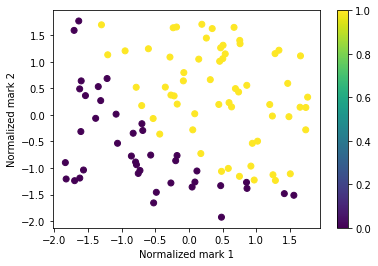

In [4]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
plt.xlabel("Normalized mark 1")
plt.ylabel("Normalized mark 2")
plt.colorbar()
plt.show()

3. Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [5]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def get_initialization(dim, eps=1e-4, concat=False):
    Z = np.random.uniform(-eps, eps, size=dim+1)
    
    if concat:
        return Z
    else:
        return Z[:-1], Z[-1]

class LogisticRegression(object):
    
    def __init__(self, W, b):
        self.W, self.b = W, b
    
    def __call__(self, X):
        Z = np.dot(X, self.W) + self.b
        return sigmoid(Z).flatten()
    
    def __repr__(self):
        return str(self.W.tolist() + [self.b])
    
    def loss(self, X, y):
        A = np.clip(self(X), 1e-6, 1. - 1e-6)
        return -np.mean(y * np.log(A) + (1.-y) * np.log(1.0 - A))
    
    def grad(self, X, y):
        m = X.shape[0]
        A = self(X)
        
        dw = np.dot(X.T, A - y) * (1.0/m)
        db = np.mean(A - y)

        return dw, db

In [67]:
def get_gradient_descent(model, alpha, eps, save_steps=False, stop_loss=True):
    def apply(X, y):
        iter_num = 0
        need_stop = False
        
        initial_loss = loss_before = loss_after = model.loss(X, y)
        steps = []
        
        if save_steps:
            steps.append(initial_loss)
        
        while not need_stop:
            dW, db = model.grad(X, y)
            assert dW.shape == model.W.shape
            
            model.W -= alpha * dW
            model.b -= alpha * db

            loss_after = model.loss(X, y)
            assert loss_before >= loss_after, (loss_before, loss_after)
            
            if stop_loss:
                need_stop = loss_before - loss_after <= eps
            else:
                need_stop = np.linalg.norm(dW) <= eps and db <= eps
            
            loss_before = loss_after
            if save_steps:
                steps.append(loss_after)
                
            iter_num += 1
        
        return {
            "initial_loss": initial_loss,
            "loss_after": loss_after,
            "loss_steps": steps,
            "model": model,
            "iter_num": iter_num
        }
    
    return apply

In [7]:
model = LogisticRegression(*get_initialization(dim=X_norm.shape[1]))
gradient_descent = get_gradient_descent(model, 0.1, 1e-6)

result = gradient_descent(X_norm, y)
result

{'initial_loss': 0.6931506816752251,
 'loss_after': 0.20423833038920697,
 'loss_steps': [],
 'model': [3.661142705499713, 3.4043102755607424, 1.562519777364541],
 'iter_num': 2468}

4. Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).

In [8]:
from scipy.optimize import minimize

def optim_fun(X, y):
    def F(z):
        W, b = z[:-1], z[-1]
        model = LogisticRegression(W, b)
        return model.loss(X, y)
    
    return F

def optim_fun_grad(X, y):
    def G(z):
        W, b = z[:-1], z[-1]
        model = LogisticRegression(W, b)
        dW, db = model.grad(X, y)
        return np.array(dW.tolist() + [db])
    
    return G

z0 = get_initialization(dim=X.shape[1], concat=True)

fun = optim_fun(X_norm, y)
grad = optim_fun_grad(X_norm, y)

In [9]:
res_1 = minimize(fun, z0, jac=grad, method='L-BFGS-B')
res_1

      fun: 0.2034977015908466
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.58391753e-07,  3.63104811e-07, -5.65616964e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 13
      nit: 12
   status: 0
  success: True
        x: array([3.99278125, 3.72513775, 1.71844805])

In [10]:
res_2 = minimize(fun, z0, method='Powell')
res_2

   direc: array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [2.05795093, 2.27291871, 1.06094691]])
     fun: 0.20349774848935057
 message: 'Optimization terminated successfully.'
    nfev: 105
     nit: 3
  status: 0
 success: True
       x: array([3.99144765, 3.72517923, 1.71816364])

5. Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам.

In [11]:
params = res_2['x']
W, b = params[:2], params[2]
model = LogisticRegression(W, b)

y_pred = model(X_norm)

6. Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.

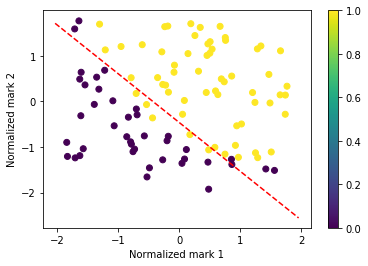

In [12]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y)

ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1, 1)
yvals = -(xvals * W[0] + b) / W[1]
plt.plot(xvals, yvals, color="red", linestyle="--")

plt.xlabel("Normalized mark 1")
plt.ylabel("Normalized mark 2")
plt.colorbar()
plt.show()

7. Загрузите данные ex2data2.txt из текстового файла.

In [13]:
data = np.loadtxt("Data/Lab 2/ex2data2.txt", delimiter=",")
X, y = data[:, :2], data[:, 2]
data.shape, X.shape, y.shape

((118, 3), (118, 2), (118,))

8. Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.

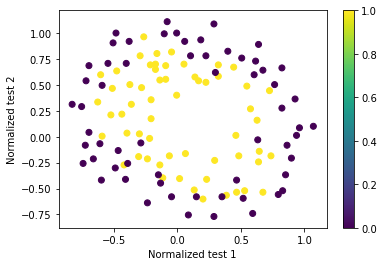

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Normalized test 1")
plt.ylabel("Normalized test 2")
plt.colorbar()
plt.show()

9. Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).

In [15]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_transform = PolynomialFeatures(degree=6)

X_wide = polynomial_transform.fit_transform(X)
assert X_wide.shape[1] == 28

10. Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.

In [16]:
class L2RegualizedLogisticRegression(LogisticRegression):
    
    def __init__(self, W, b, C):
        super().__init__(W, b)
        self.C = C
    
    def loss(self, X, y):
        return super().loss(X, y) + 0.5 * C * np.sum(self.W**2)
    
    def grad(self, X, y):
        dW, db = super().grad(X, y)
        return dW + C * self.W, db

In [17]:
C = 1e-4

W, b = get_initialization(dim=X_wide.shape[1])
regularized_model = L2RegualizedLogisticRegression(W, b, C)

gradient_descent = get_gradient_descent(regularized_model, 0.1, 1e-6)
result = gradient_descent(X_wide, y)
result

{'initial_loss': 0.6931394237925155,
 'loss_after': 0.34731212935569805,
 'loss_steps': [],
 'model': [1.5668555999330895, 2.30136021961523, 3.5639130528792204, -5.046442720841535, -4.140652299489851, -5.136743176151153, 1.0038041041991903, -1.4700535163609105, -0.8573952236570154, -0.377532919139466, -4.052262176140306, 0.3584784979144014, -2.16628833923743, -1.57427528202074, -3.3290769176862445, -0.6330870822628213, -0.6760792228614707, 0.5062196548933026, -1.3143415036216188, -1.5045550019252307, -0.15422500427925576, -3.23325982732569, 0.40911264258338736, -0.946646261280057, 0.3299334234606274, -1.3126923419414682, -1.187476047304806, -1.531432318925739, 1.708893180903939],
 'iter_num': 11403}

11. Реализуйте другие методы оптимизации.

In [18]:
from scipy.optimize import minimize

def optim_fun(X, y, C):
    def F(z):
        W, b = z[:-1], z[-1]
        model = L2RegualizedLogisticRegression(W, b, C)
        return model.loss(X, y)
    
    return F

def optim_fun_grad(X, y, C):
    def G(z):
        W, b = z[:-1], z[-1]
        model = L2RegualizedLogisticRegression(W, b, C)
        dW, db = model.grad(X, y)
        return np.array(dW.tolist() + [db])
    
    return G

z0 = get_initialization(dim=X_wide.shape[1], concat=True)

fun = optim_fun(X_wide, y, C)
grad = optim_fun_grad(X_wide, y, C)

In [19]:
res_1 = minimize(fun, z0, jac=grad, method='L-BFGS-B')
assert res_1['success'] == True
res_1['x']

array([ 0.0067086 ,  2.07342044,  4.54860105, -5.48984726, -6.46525321,
       -6.11727374,  1.9815514 , -0.31979128,  2.11818371, -2.32989685,
       -3.84995768,  2.79875924, -3.49039033, -2.00841517, -5.8268305 ,
       -1.60387785, -0.76887091,  4.49918194, -3.35731637, -3.91202268,
        2.49036127, -5.15472481,  0.58325278, -0.85519644,  2.85298926,
       -4.04073366, -3.33206365,  0.19681116,  3.74283626])

In [20]:
res_2 = minimize(fun, z0, method='Powell')
assert res_2['success'] == True
res_2['x']

array([ 0.4240608 ,  2.35669985,  4.38356482, -5.89335781, -6.39711074,
       -6.72621738,  1.1885439 ,  0.01223337,  2.10565719, -1.80579768,
       -3.68358696,  2.0777834 , -3.40662984, -2.75336635, -5.43669288,
       -1.17412603, -0.61407838,  4.82059094, -3.14341365, -3.38111908,
        2.43250569, -4.78820281,  0.98054171, -0.64357486,  3.12882739,
       -4.01441659, -3.18473257,  0.04463076,  3.45059735])

12. Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов.

In [21]:
def get_model(model):
    def predict(X_new):
        X_wider = polynomial_transform.transform(X_new)
        return model(X_wider)
    
    return predict

trained_model = get_model(result['model'])

13. Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.

In [22]:
def plot_data_and_model(X, y, model):
    def get_model_dividing_curve(num=100):
        xx1 = np.linspace(-1, 1, num)
        xx2 = np.linspace(-1, 1, num)

        z = np.zeros((num, num))
        for i_x1, x1 in enumerate(xx1):
            for i_x2, x2 in enumerate(xx2):
                z[i_x1, i_x2] = model(np.array([[x1, x2]]))

        return xx1, xx2, z
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    xx1, xx2, z = get_model_dividing_curve()
    plt.contour(xx1, xx2, z, levels=[0.5], colors='red', linestyles='--')
    plt.xlabel("Normalized test 1")
    plt.ylabel("Normalized test 2")
    plt.show()

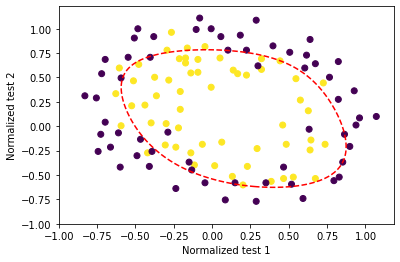

In [23]:
plot_data_and_model(X, y, trained_model)

14. Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей кривой? Ответ дайте в виде графиков.

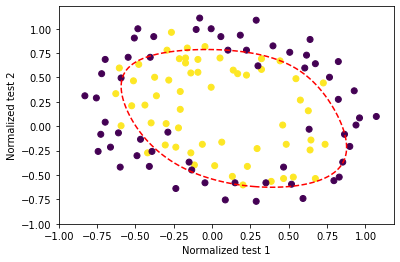

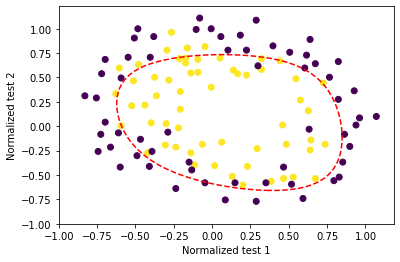

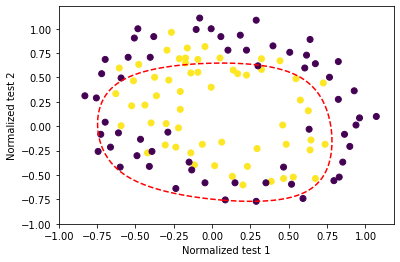

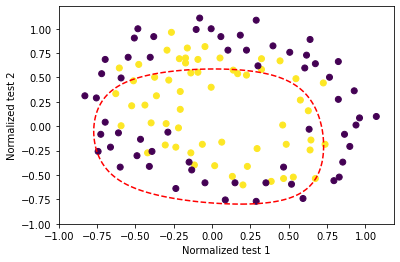

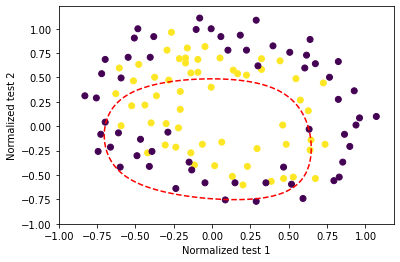

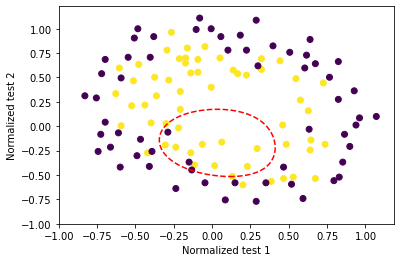

In [24]:
C_list = [0, 1e-2, 1e-1, 0.25, 0.5, 1.]

for C in C_list:
    W, b = get_initialization(dim=X_wide.shape[1])
    regularized_model = L2RegualizedLogisticRegression(W, b, C)

    gradient_descent = get_gradient_descent(regularized_model, 0.1, 1e-6)
    result = gradient_descent(X_wide, y)
    trained_model = get_model(result['model'])
    
    plot_data_and_model(X, y, trained_model)

15. Загрузите данные ex2data3.mat из файла.

In [68]:
from scipy.io import loadmat
data = loadmat("Data/Lab 2/ex2data3.mat")
X, y = data["X"], data["y"].flatten()
X.shape, y.shape

((5000, 400), (5000,))

16. Визуализируйте несколько случайных изображений из набора данных. Визуализация должна содержать каждую цифру как минимум один раз.

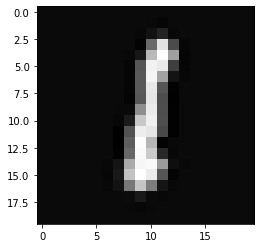

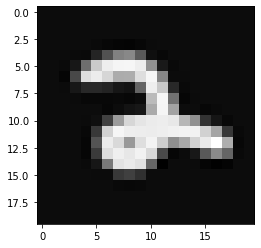

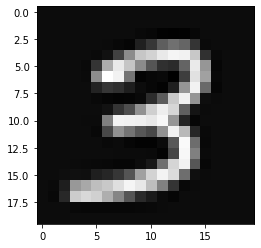

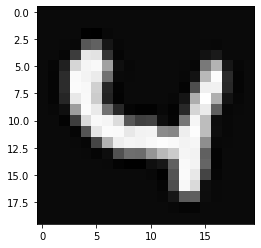

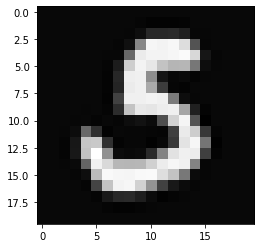

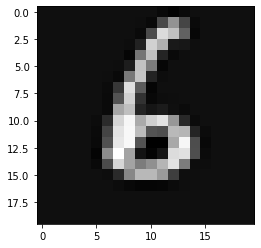

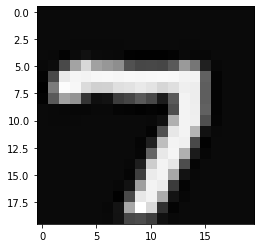

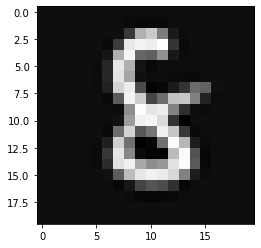

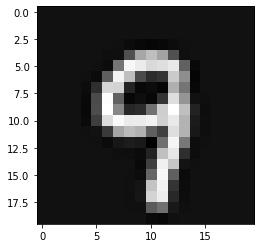

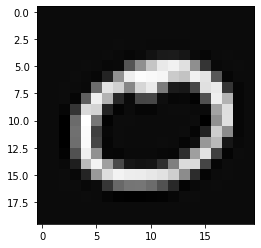

In [83]:
n = 1

for idx in range(1, 11):
    idx_range = np.where(y == idx)[0]
    idx_subset = np.random.choice(idx_range, size=n)
    
    images = X[idx_subset].reshape((n, 20, 20), order='F')
    for batch_idx in range(n):
        plt.imshow(images[0, :, :], cmap="gray")
        plt.show()

17. Реализуйте бинарный классификатор с помощью логистической регрессии с использованием векторизации (функции потерь и градиентного спуска).

In [70]:
X_norm = X - X.mean(axis=0)

In [84]:
idx = 10
y_new = y.copy()
y_new[y == idx] = 1
y_new[y != idx] = 0

In [85]:
model = LogisticRegression(*get_initialization(dim=X_norm.shape[1]))
gradient_descent = get_gradient_descent(model, 0.1, 1e-6)

result = gradient_descent(X_norm, y_new)
result

{'initial_loss': 0.6931092205954564,
 'loss_after': 0.02190470431827471,
 'loss_steps': [],
 'model': [9.029866907253436e-05, -7.60148939562278e-05, 1.4364755420665725e-05, -5.817943305526931e-05, 9.170976287007911e-08, 0.0011329989398509261, 0.0008190158627536364, 0.0006176344945357632, 8.211332817761938e-05, -0.000477940100805097, -0.000197686670476429, 0.0001153361349405428, 0.00027916203420210193, 0.0013293314951062468, 0.0012529038713242236, 5.462330625076768e-05, 1.8748711142786843e-05, -7.357329949271456e-05, -5.043180958866274e-05, -5.249132281119373e-05, 9.398686036679048e-05, 1.1714991876765519e-05, -4.791786780957645e-05, 0.0007415503086433781, 0.0005610843551898943, -0.006581383049013, -0.0012814081592077249, -0.0004461278949075021, -0.002196990871692596, 0.006568239714594787, 0.0031957318690893303, 0.000315042220513618, -0.0012905042023462212, -0.010109146090723055, -0.009905608392391045, 0.00038426036089419353, 0.001004789084730231, 0.0007489245888613144, 2.43417620984391

18. Добавьте L2-регуляризацию к модели.

In [86]:
C = 5e-4
W, b = get_initialization(dim=X_norm.shape[1])
regularized_model = L2RegualizedLogisticRegression(W, b, C)

gradient_descent = get_gradient_descent(regularized_model, 0.1, 1e-6)
result = gradient_descent(X_norm, y_new)
result

{'initial_loss': 0.6931400917472146,
 'loss_after': 0.030945406720337295,
 'loss_steps': [],
 'model': [3.700100664615079e-05, 6.100862268010836e-05, -2.2871985619920032e-05, 6.320153438646086e-05, 9.747752828313057e-05, 0.0006844896629271075, 0.0005878952372410408, 0.0004164102799894523, 0.00020276363488465747, -0.0003278678962487115, -0.00012404665046405794, 0.0001015513330847471, 0.00021989487590485791, 0.0009790439385021638, 0.000810596612929281, 8.282381337656642e-06, 3.509921501382366e-05, -6.96652524854401e-05, 4.180887341020056e-05, -4.8933211461574854e-05, 5.76540855239689e-05, 2.9997857341099997e-05, 3.353547800480792e-05, 0.0004216916703897797, 0.00036091920313415665, -0.004915487138668073, -0.0011064925920714996, -0.0009562340539748755, -0.0021926647428267107, 0.004738423530379865, 0.0022514275737621336, -7.252368705632126e-05, -0.0014360830034415705, -0.007296701678406361, -0.006999252815591229, 0.00033747890093497294, 0.0006002660881511412, 0.0004271193339733299, 5.146347

19. Реализуйте многоклассовую классификацию по методу “один против всех”.

In [1]:
import pandas as pd
from copy import deepcopy
from collections import OrderedDict

class OneVsRestClassifier(object):
    
    def __init__(self, base_model, alpha, eps=1e-6):
        self._base_model = base_model
        self._alpha = alpha
        self._eps = eps
        self._trained_models = OrderedDict()
    
    def fit(self, X, y):        
        for class_id in sorted(np.unique(y)):
            print("Fitting {} vs all".format(class_id))
            model = deepcopy(self._base_model)
            assert model != self._base_model
            
            y_mocked = y.copy()
            y_mocked[y == class_id] = 1
            y_mocked[y != class_id] = 0
            
            gradient_descent = get_gradient_descent(model, self._alpha, self._eps)
            result = gradient_descent(X, y_mocked)
            self._trained_models[class_id] = result['model']
    
    def predict(self, X):
        return pd.DataFrame({class_id: model(X) for class_id, model in self._trained_models.items()})

20. Реализуйте функцию предсказания класса по изображению с использованием обученных классификаторов. Процент правильных классификаций на обучающей выборке должен составлять около 95%.

In [134]:
C = 1e-5
W, b = get_initialization(dim=X_norm.shape[1])
base_model = L2RegualizedLogisticRegression(W, b, C)

one_vs_all_model = OneVsRestClassifier(base_model, alpha=1.0)
one_vs_all_model.fit(X_norm, y)

Fitting 1 vs all
Fitting 2 vs all
Fitting 3 vs all
Fitting 4 vs all
Fitting 5 vs all
Fitting 6 vs all
Fitting 7 vs all
Fitting 8 vs all
Fitting 9 vs all
Fitting 10 vs all


In [135]:
y_pred_probas = one_vs_all_model.predict(X_norm)
y_pred_probas

,1,2,3,4,5,6,7,8,9,10
0,1.255623e-08,3.547836e-04,5.777985e-05,3.356598e-08,5.901206e-04,9.042339e-06,0.000029,1.827213e-05,0.001737,9.977254e-01
1,5.924571e-07,2.657939e-05,7.953948e-05,1.505557e-08,6.110648e-03,5.357375e-08,0.000048,7.556812e-07,0.000052,9.993549e-01
2,4.923146e-10,3.702925e-04,7.642900e-04,1.654584e-07,6.324928e-04,3.749742e-04,0.000002,1.845533e-02,0.001332,9.942844e-01
3,7.762320e-11,4.659154e-04,9.129123e-05,2.385217e-07,1.065537e-05,1.333188e-03,0.000006,1.062483e-04,0.000179,9.996736e-01
4,1.108249e-10,3.938447e-06,1.410603e-04,1.221257e-09,3.229584e-03,4.512948e-13,0.000001,6.807487e-05,0.000005,9.992000e-01
...,...,...,...,...,...,...,...,...,...,...
4995,1.550698e-03,9.860480e-05,5.515243e-04,3.957370e-02,1.343616e-02,9.217174e-04,0.004476,5.263123e-04,0.874420,8.756947e-05
4996,3.529376e-08,1.423327e-05,1.786284e-08,5.393715e-05,1.054987e-08,2.546505e-06,0.005085,4.371662e-02,0.990580,8.128093e-04
4997,5.065234e-02,2.429174e-03,7.684505e-02,5.445083e-04,1.057916e-01,1.020069e-02,0.000057,1.855222e-03,0.830668,2.988351e-07
4998,4.477462e-07,8.451166e-09,2.905547e-06,4.496204e-02,1.356049e-03,3.113772e-07,0.000661,6.352317e-02,0.903815,1.173209e-05


In [136]:
y_pred = y_pred_probas.idxmax(axis=1).to_numpy()

In [138]:
accuracy = np.sum(y == y_pred) / len(y)
print("Train set accuracy:", accuracy)

Train set accuracy: 0.9476
